"""This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html
Donor: Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to
determine whether a person makes over 50K a year. Conversion of original data as
follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.
Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian
noninstitutional population of the US. These are prepared monthly for us by Population
Division here at the Census Bureau. We use 3 sets of controls.
These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6
times so that by the end we come back to all the controls we used.
The term estimate refers to population totals derived from CPS by creating "weighted
tallies" of any specified socio-economic characteristics of the population. People with
similar demographic characteristics should have similar weights. There is one important
caveat to remember about this statement. That is that since the CPS sample is actually a
collection of 51 state samples, each with its own probability of selection, the statement
only applies within state."""

##Problem 1:
Prediction task is to determine whether a person makes over 50K a year.

Problem 2:
Which factors are important

Problem 3:
Which algorithms are best for this dataset


In [1]:
#importing the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital status','Occupation','Relationship',
          'Race','Sex','Capital gain','Capital loss','Hours per week','Native country','Income']

train = pd.read_csv('adult.data',names = columns)
test = pd.read_csv('adult.test',names=columns, skiprows=1)
df = pd.concat([train, test], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
Age               48842 non-null int64
Workclass         48842 non-null object
fnlgwt            48842 non-null int64
Education         48842 non-null object
Education num     48842 non-null int64
Marital status    48842 non-null object
Occupation        48842 non-null object
Relationship      48842 non-null object
Race              48842 non-null object
Sex               48842 non-null object
Capital gain      48842 non-null int64
Capital loss      48842 non-null int64
Hours per week    48842 non-null int64
Native country    48842 non-null object
Income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [2]:
df['Income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [3]:
# Converting Income into numeric

df['Income'] = df['Income'].apply(lambda x: 1 if x == ' >50K' else 0)
df['Income'].unique()

array([0, 1], dtype=int64)

In [4]:
# Remove spaces if any

for col in df.columns:
    if type(df[col].iloc[0]) == str:
        
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

df.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [5]:
# Creating a copy for visualization

dff = df


In [7]:
####################REMOVE UNKNOWNS
    
dff.replace('?', np.nan, inplace=True)###making copy for visualization
df.replace(' ?', np.nan, inplace = True)

In [8]:
dff['Workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
# Convert Categical values into dummy variables
df = pd.concat([df, pd.get_dummies(df['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
df.drop('Workclass',axis=1,inplace=True)

In [10]:
df = pd.concat([df, pd.get_dummies(df['Marital status'],prefix='Marital Status',prefix_sep=':')], axis=1)
df.drop('Marital status',axis=1,inplace=True)

In [11]:
df = pd.concat([df, pd.get_dummies(df['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
df.drop('Occupation',axis=1,inplace=True)

In [12]:
df = pd.concat([df, pd.get_dummies(df['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
df.drop('Relationship',axis=1,inplace=True)

In [13]:
df = pd.concat([df, pd.get_dummies(df['Race'],prefix='Race',prefix_sep=':')], axis=1)
df.drop('Race',axis=1,inplace=True)

In [14]:
df = pd.concat([df, pd.get_dummies(df['Sex'],prefix='Sex',prefix_sep=':')], axis=1)
df.drop('Sex',axis=1,inplace=True)

In [15]:
df = pd.concat([df, pd.get_dummies(df['Native country'],prefix='Native country',prefix_sep=':')], axis=1)
df.drop('Native country',axis=1,inplace=True)

In [16]:
df.drop('Education', axis=1,inplace=True)
df.head()

,Age,fnlgwt,Education num,Capital gain,Capital loss,Hours per week,Income,Workclass:Federal-gov,Workclass:Local-gov,Workclass:Never-worked,...,Native country:Portugal,Native country:Puerto-Rico,Native country:Scotland,Native country:South,Native country:Taiwan,Native country:Thailand,Native country:Trinadad&Tobago,Native country:United-States,Native country:Vietnam,Native country:Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([8432., 8686., 9120., 9157., 5965., 3876., 2456.,  777.,  277.,
          96.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

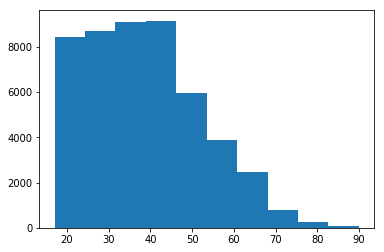

In [17]:
plt.hist(dff['Age'])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

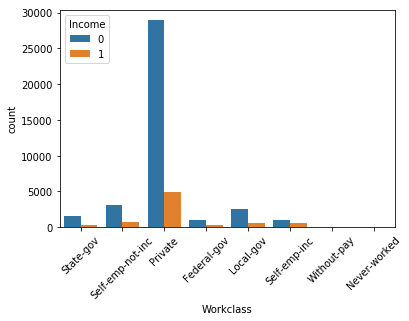

In [18]:
# WorkClass
sns.countplot(x = 'Workclass', hue = 'Income', data = dff)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

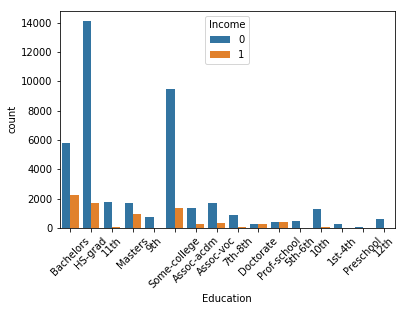

In [19]:
#Education
sns.countplot(x = 'Education', hue = 'Income', data = dff)
plt.xticks(rotation=45)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

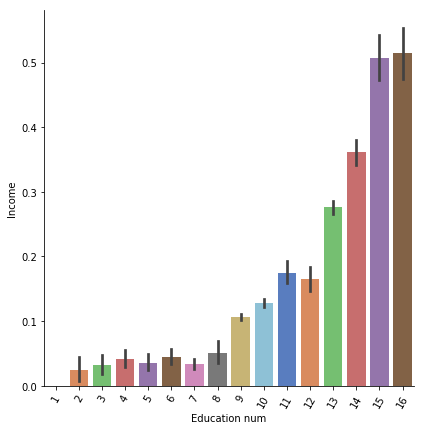

In [20]:
sns.factorplot(x="Education num",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

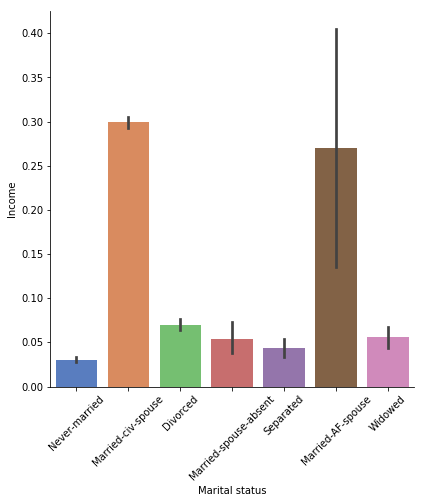

In [22]:
sns.factorplot(x = 'Marital status',y = 'Income',data = dff,kind = 'bar',size = 6,palette = 'muted')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

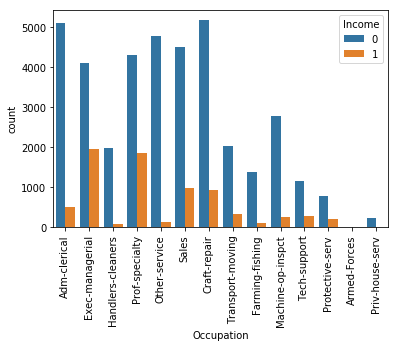

In [23]:
sns.countplot(x = 'Occupation', hue = 'Income', data = dff)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

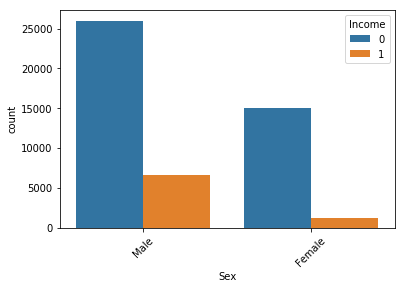

In [24]:
sns.countplot(x = 'Sex', hue = 'Income', data = dff)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

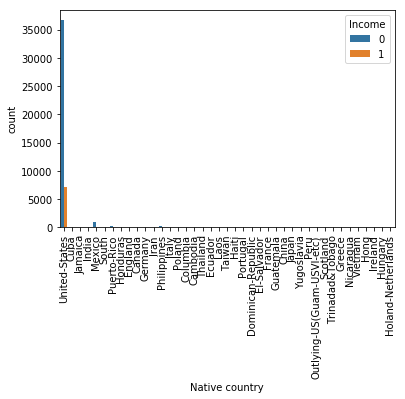

In [26]:
sns.countplot(x = 'Native country', hue = 'Income', data = dff)
plt.xticks(rotation=90)

In [29]:
# Separating into dependent and independent variables

X = np.array(df.drop(['Income'],1))
y = np.array(df['Income'])

#Scaling the data

from sklearn import preprocessing
X = preprocessing.scale(X)

# Splitting the data into train and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 30)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [30]:
# Apply Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[7926  327]
 [1106  410]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8253
           1       0.56      0.27      0.36      1516

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.72      0.62      0.64      9769
weighted avg       0.83      0.85      0.83      9769

The Accuracy for Logistic Regression is 0.8533114955471389


In [32]:
# Applying KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knnpre = knn.predict(X_test)
KNA = accuracy_score(y_test,knnpre)

print(confusion_matrix(y_test,knnpre))
print(classification_report(y_test,knnpre))
print("The Accuracy Score for KNN Classifier is {}".format(KNA))

[[7690  563]
 [1045  471]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      8253
           1       0.46      0.31      0.37      1516

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.67      0.62      0.64      9769
weighted avg       0.81      0.84      0.82      9769

The Accuracy Score for KNN Classifier is 0.8353976865595251


In [35]:
# Decession Tree

from sklearn.tree import DecisionTreeClassifier

dcc = DecisionTreeClassifier(max_depth = 4)
dcc.fit(X_train,y_train)
dccpre = dcc.predict(X_test)
DCA = accuracy_score(y_test,dccpre)
print(confusion_matrix(y_test,dccpre))
print(classification_report(y_test,dccpre))
print("The Accuracy Score for Dccession Tree is {}".format(DCA))

[[8069  184]
 [1176  340]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8253
           1       0.65      0.22      0.33      1516

   micro avg       0.86      0.86      0.86      9769
   macro avg       0.76      0.60      0.63      9769
weighted avg       0.84      0.86      0.83      9769

The Accuracy Score for Dccession Tree is 0.8607841130105436


In [37]:
# SVC

from sklearn.svm import SVC

svc = SVC(C = 1.0, kernel = 'linear')
svc.fit(X_train,y_train)
svcpre = svc.predict(X_test)
print(confusion_matrix(y_test,svcpre))
print(classification_report(y_test,svcpre))
SVA = accuracy_score(y_test,svcpre)
print("The Accuracy Score for Suppport Vector Classifier is {}".format(SVA))

[[8235   18]
 [1489   27]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8253
           1       0.60      0.02      0.03      1516

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.72      0.51      0.48      9769
weighted avg       0.81      0.85      0.78      9769

The Accuracy Score for Suppport Vector Classifier is 0.8457365134609479


In [39]:
# XGBoost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

model = XGBClassifier()
param_grid = {'n_estimators':[100,200,300,400,500],
             'learning_rate':[0.0001,0.001,0.01,0.1,0.2,0.3]}

kfold = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 7)
grid_search = GridSearchCV(model,param_grid,scoring = "neg_log_loss",n_jobs = -1,cv = kfold)
grid_result = grid_search.fit(X_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.291931 using {'learning_rate': 0.1, 'n_estimators': 500}


In [42]:
# Applying XGBoost with best Parameters

model_xgb = XGBClassifier(learning_rate =0.1,
                          n_estimators=500,
                          max_depth = 5,                        
                          min_child_weight=4)
model_xgb.fit(X_train,y_train)
xgbpre = model_xgb.predict(X_test)
XGBA = accuracy_score(y_test,xgbpre)
print(confusion_matrix(y_test,xgbpre))
print(classification_report(y_test,xgbpre))
print("The Accracy Score for XGBoost is {}".format(XGBA))

[[7852  401]
 [ 931  585]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      8253
           1       0.59      0.39      0.47      1516

   micro avg       0.86      0.86      0.86      9769
   macro avg       0.74      0.67      0.69      9769
weighted avg       0.85      0.86      0.85      9769

The Accracy Score for XGBoost is 0.8636503224485618


# As we can see the max Accuracy achieved with XGBClassifier